Aditya N Bhatt
231057015
AI&ML

In [1]:
import itertools
import numpy as np
import pandas as pd
import random

In [12]:
class GridWorldEnv:
  def __init__(self, N = 10, M = 10):
    # States of a gridworld
    self.N = N
    self.M = M

    # state space
    self.observation_space = list(itertools.product(range(self.N), range(self.M)))
    # action space
    self.action_space = [(0,1), (0,-1), (1,0), (-1,0)]

    self.terminal_states = [(3,3)]
    self.reset()

  def reset(self):
    self.state = (0,0)
    self.is_terminated = False
    self.total_reward = 0

  def get_transition_probaility(self, start_state, action, end_state):
    if start_state in self.terminal_states:
      return 0

    expected_state = tuple(np.array(start_state) + np.array(action))
    if expected_state == end_state:
      return 1

    if expected_state not in self.observation_space and start_state == end_state:
      return 1

    return 0

  def get_reward(self, start_state, action, end_state):
    if end_state in self.terminal_states:
      return 10
    else:
      return -1

  def step(self, action):
    if self.state in self.terminal_states:
      self.is_terminated = True
      reward = np.nan
      return self.state, reward, self.is_terminated

    current_state = self.state
    max_prob = 0
    for possible_state in self.observation_space:
      p = self.get_transition_probaility(current_state, action, possible_state)
      if p > max_prob:
        max_prob = p
        next_state = possible_state

    reward = self.get_reward(current_state, action, next_state)

    self.state = next_state
    self.total_reward += reward

    return self.state, reward, self.is_terminated


class RandomActionAgent:
  def __init__(self, env):
    self.env = env

  def policy(self):
    action = random.choices(self.env.action_space)[0]
    return

  def train(self):
    pass

In [3]:
env = GridWorldEnv(5,5)

In [4]:
env.state

(0, 0)

In [5]:
action = (1, 0)
next_state, reward, is_terminated = env.step(action)

print("Next state: ", next_state)
print("Reward: ", reward)

Next state:  (1, 0)
Reward:  -1


### Random walk

In [31]:
class RandomActionAgent:
    def __init__(self, env):
        self.env = env

    def policy(self):
        action = random.choice(self.env.action_space)
        return action

In [32]:
env.reset()
agent = RandomActionAgent(env)

while not env.is_terminated:
  current_state = env.state
  action =  agent.policy()
  next_state, reward, is_terminated = env.step(action)
  print(current_state, action, reward, next_state)

env.total_reward

(0, 0) (0, -1) -1 (0, 0)
(0, 0) (-1, 0) -1 (0, 0)
(0, 0) (1, 0) -1 (1, 0)
(1, 0) (0, -1) -1 (1, 0)
(1, 0) (1, 0) -1 (2, 0)
(2, 0) (0, 1) -1 (2, 1)
(2, 1) (1, 0) -1 (3, 1)
(3, 1) (-1, 0) -1 (2, 1)
(2, 1) (1, 0) -1 (3, 1)
(3, 1) (0, 1) -1 (3, 2)
(3, 2) (0, 1) 10 (3, 3)
(3, 3) (-1, 0) nan (3, 3)


0

In [33]:
class DPAgent:
  def __init__(self, env):
    self.env = env
    self.gamma = 1

    self.v = dict(zip(self.env.observation_space, np.zeros(self.env.N*self.env.M)))
    self.is_trained = False


  def policy(self):
    if not self.is_trained:
      action = random.choices(self.env.action_space)[0]
    else:
      s = self.env.state
      max = -np.inf
      for a in self.env.action_space:
        term = 0
        for s_prime in self.env.observation_space:
          term+= self.env.get_transition_probaility(s, a, s_prime) * (self.env.get_reward(s, a, s_prime) + self.gamma * self.v[s_prime])
        if term > max:
          max = term
          action = a

    return action

  def train(self, iter_limit = 1000):

    print("performing training...")

    self.v = dict(zip(self.env.observation_space, np.zeros(self.env.N*self.env.M)))

    iter = 0
    while iter< iter_limit:
      for s in self.env.observation_space:
        max = -np.inf
        for a in self.env.action_space:
          term2 = 0
          for s_prime in self.env.observation_space:
            term2+= self.env.get_transition_probaility(s, a, s_prime) * (self.env.get_reward(s, a, s_prime) + self.gamma*self.v[s_prime])
          if term2 > max:
            max = term2
        self.v[s] = max
      iter+=1

    self.is_trained = True

    print(np.array(list(self.v.values())).reshape(self.env.N, self.env.M))

In [34]:
env = GridWorldEnv(5,5)
dp_agent = DPAgent(env)

dp_agent.train(iter_limit = 100)

performing training...
[[ 5.  6.  7.  8.  7.]
 [ 6.  7.  8.  9.  8.]
 [ 7.  8.  9. 10.  9.]
 [ 8.  9. 10.  0. 10.]
 [ 7.  8.  9. 10.  9.]]


In [35]:
env = GridWorldEnv(5,5)
dp_agent = DPAgent(env)

dp_agent.train(iter_limit = 100)

env.reset()

while not env.is_terminated:
  current_state = env.state
  action =  dp_agent.policy()
  next_state, reward, is_terminated = env.step(action)
  # print(current_state, action, reward, next_state)

env.total_reward

performing training...
[[ 5.  6.  7.  8.  7.]
 [ 6.  7.  8.  9.  8.]
 [ 7.  8.  9. 10.  9.]
 [ 8.  9. 10.  0. 10.]
 [ 7.  8.  9. 10.  9.]]


5

Create a heatmap of optimal state values of 10 X 10 gridworld

performing training...
[[ 5.  6.  7.  8.  7.  6.  5.  4.  3.  2.]
 [ 6.  7.  8.  9.  8.  7.  6.  5.  4.  3.]
 [ 7.  8.  9. 10.  9.  8.  7.  6.  5.  4.]
 [ 8.  9. 10.  0. 10.  9.  8.  7.  6.  5.]
 [ 7.  8.  9. 10.  9.  8.  7.  6.  5.  4.]
 [ 6.  7.  8.  9.  8.  7.  6.  5.  4.  3.]
 [ 5.  6.  7.  8.  7.  6.  5.  4.  3.  2.]
 [ 4.  5.  6.  7.  6.  5.  4.  3.  2.  1.]
 [ 3.  4.  5.  6.  5.  4.  3.  2.  1.  0.]
 [ 2.  3.  4.  5.  4.  3.  2.  1.  0. -1.]]


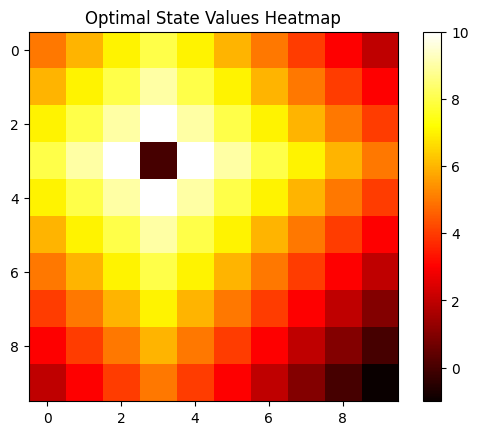

In [36]:
import matplotlib.pyplot as plt

# Create a 10x10 gridworld environment
env = GridWorldEnv(10, 10)

# Create a DPAgent and train it
dp_agent = DPAgent(env)
dp_agent.train(iter_limit=100)

# Get the optimal state values from the agent
optimal_state_values = np.array(list(dp_agent.v.values())).reshape(env.N, env.M)

# Create a heatmap of the optimal state values
plt.imshow(optimal_state_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Optimal State Values Heatmap')
plt.show()


Optimal state values through value iteration.


In [ ]:
def value_iteration(env, gamma=0.99, theta=1e-4):
    V = {s: 0 for s in env.states}  # Initialize value function

    while True:
        delta = 0  # Initialize delta to track changes in value function
        for s in env.states:  # For each state in the environment
            v = V[s]  # Store the current value of state s
            V[s] = max(sum(p * (r + gamma * V[s_]) for p, s_, r, _ in env.transitions(s, a)) for a in env.actions(s))
            delta = max(delta, abs(v - V[s]))  # Update delta

        if delta < theta:  # If the value function has converged
            break

    return V

What are the average total rewards that the agent gets, with and without training.


In [38]:
def calculate_average_rewards(env, agent, trained_agent, episodes=1000):
    total_reward_untrained = 0
    total_reward_trained = 0

    for _ in range(episodes):
        state = env.reset()
        done = False

        while not done:
            action = agent.policy(state)
            next_state, reward, done, _ = env.step(action)
            total_reward_untrained += reward
            state = next_state

        state = env.reset()
        done = False

        while not done:
            action = trained_agent.policy(state)
            next_state, reward, done, _ = env.step(action)
            total_reward_trained += reward
            state = next_state

    average_reward_untrained = total_reward_untrained / episodes
    average_reward_trained = total_reward_trained / episodes

    return average_reward_untrained, average_reward_trained

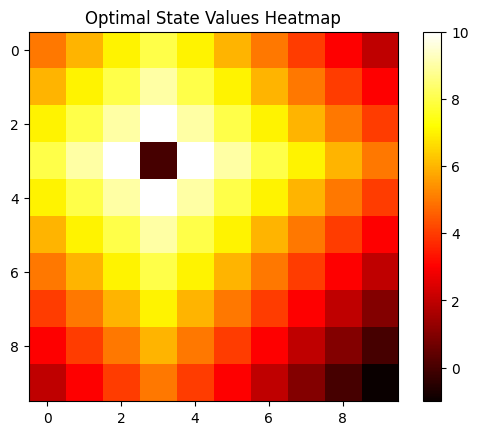

In [39]:
plt.imshow(optimal_state_values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Optimal State Values Heatmap')
plt.show()
